# Portfolio Optimization and Efficient Frontier Analysis

This notebook explores portfolio optimization using quadratic programming and analytical methods. It covers the following topics:

- **Constrained Optimization:** Solving for optimal asset allocations under linear constraints using `scipy.optimize.minimize`.
- **Efficient Frontier Construction:** Calculating and plotting the efficient frontier for a portfolio of three assets, including analytical and quadratic programming approaches.
- **Portfolio Weights Calculation:** Determining optimal weights for portfolios with specific return or risk targets.
- **Capital Market Line (CML) and Tangent Portfolio:** Identifying the tangent portfolio that maximizes the Sharpe ratio and illustrating the CML.
- **Visualization:** Graphically representing the efficient frontier, individual assets, asymptotes, and special portfolios (e.g., tangent, target return/risk portfolios).
- **Interpretation:** Providing insights into the relationship between risk, return, and optimal portfolio selection.

The notebook combines mathematical derivations, numerical optimization, and clear visualizations to provide a comprehensive understanding of modern portfolio theory concepts.

In [426]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

## Question 1

In [427]:
# Define the objective function
def objective_function(x):
    return (x[0] - 2)**2 + 2*(x[1] - 1)**2

# Define the inequality constraints
def constraint1(x):
    return  3-(x[0] + 4*x[1])

def constraint2(x):
    return x[0]-x[1]

# Initial guess
initial_guess = [0, 0]

# Define the constraints
constraints = ({'type': 'ineq', 'fun': constraint1},
               {'type': 'ineq', 'fun': constraint2})

# Minimize the objective function subject to the constraints
result = minimize(objective_function, initial_guess, constraints=constraints, method= "SLSQP")

# Display the result
print("Optimal values of x1 and x2:", result.x)
print("Minimum value of the objective function:", result.fun)


Optimal values of x1 and x2: [1.66666666 0.33333333]
Minimum value of the objective function: 1.0000000000000053


## Question 2

In [428]:
Q = np.matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = np.matrix([[.045,.003,.0285]]).T
e = np.matrix([[1,1,1]]).T
rho_t1 = rho[0]/3
rho_t2 = rho[1]+rho[2]
rho_t3 = (rho[0]+rho[1]+rho[2])/3

### Global Min Variance Portfolio


In [429]:
lam_vec = -np.linalg.inv(e.T@np.linalg.inv(Q)@e)
w_vec = -np.linalg.inv(Q)@e@lam_vec
w_vec

matrix([[0.44946809],
        [0.35638298],
        [0.19414894]])

In [430]:
A = np.vstack((e.T,rho.T))
b_1 = np.vstack((1,rho_t1)) 
b_2 = np.vstack((1,rho_t2)) 

In [431]:
def find_lam(Q,A,b):
    Q_inv = np.linalg.inv(Q)
    lam_vec = -np.linalg.inv(A@Q_inv@A.T)@b
    return lam_vec

def find_weights(Q,A,lam_vec):
    Q_inv = np.linalg.inv(Q)
    w_vec = -Q_inv@A.T@lam_vec
    return w_vec

In [432]:
lam_vec_1 = find_lam(Q,A,b_1)
w_vec_1 = find_weights(Q,A,lam_vec_1)

lam_vec_2 = find_lam(Q,A,b_2)
w_vec_2 = find_weights(Q,A,lam_vec_2)


### Portfolio 1 and 2

In [433]:
w_vec_1

matrix([[0.19278391],
        [0.65415429],
        [0.1530618 ]])

In [434]:
w_vec_2

matrix([[0.55084318],
        [0.23878088],
        [0.21037593]])

### Portfolio 3

In [435]:
alpha = (rho_t3[0]-rho_t2[0])/(rho_t1[0]-rho_t2[0])
w_vec_3 = w_vec_1*alpha+w_vec_2*(1-alpha)
w_vec_3

matrix([[0.42063981],
        [0.38982576],
        [0.18953443]])

In [436]:
w_vec_3.T@rho

matrix([[0.0255]])

In [437]:
Q = matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = matrix([[.045,.003,.0285]])
A = matrix(np.c_[np.ones(3), rho]).T
b_1 = matrix(np.c_[np.ones(1),rho[0]/3]).T
b_2 = matrix(np.c_[np.ones(1),rho[1]+rho[2]]).T
b_3 = matrix(np.c_[np.ones(1),(rho[1]+rho[2]+rho[0])/3]).T
q = matrix(np.zeros((3, 1)))
#e = np.matrix([[1,1,1]]).T
#rho_t1 = rho[0]/3
#rho_t2 = rho[1]+rho[2]
#A = np.vstack((e.T,rho.T))
#b_1 = np.vstack((1,rho_t1)) 
#b_2 = np.vstack((1,rho_t2)) 

In [438]:
sol_1 = solvers.qp(Q,q, A=A, b=b_1)
sol_2 = solvers.qp(Q,q, A=A, b=b_2)
sol_3 = solvers.qp(Q,q, A=A, b=b_3)

In [439]:
weight_1 = sol_1['x']

In [440]:
weight_2 = sol_2['x']

In [441]:
weight_3 = sol_3['x']

### Checking Portfolio 1,2,3 weights

In [442]:
print(weight_1,weight_2,weight_3)

[ 1.93e-01]
[ 6.54e-01]
[ 1.53e-01]
 [ 5.51e-01]
[ 2.39e-01]
[ 2.10e-01]
 [ 4.21e-01]
[ 3.90e-01]
[ 1.90e-01]



### Graph of Efficient Frontier, Assets, Asymptotes and P3

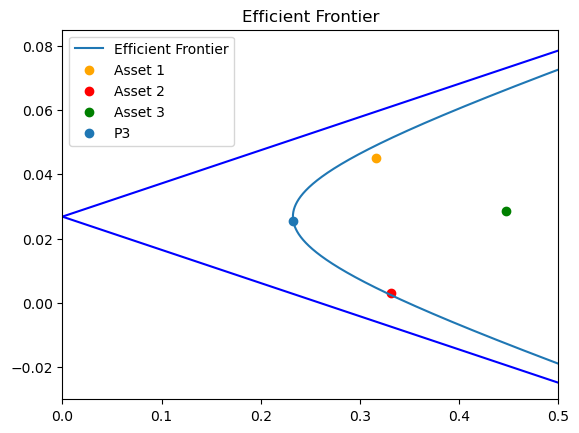

In [443]:
Q = np.matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = np.matrix([[.045,.003,.0285]]).T
e = np.matrix([[1,1,1]]).T
rho_t1 = rho[0]/3
rho_t2 = rho[1]+rho[2]
rho_t3 = (rho[0]+rho[1]+rho[2])/3

alphas = np.arange(-5,5.001,.001)
rhos=[]
sigmas = []
for a in alphas:
    w_vec_a = w_vec_1*a+w_vec_2*(1-a)
    x= w_vec_a.T@rho
    x = np.array(x.T)[0]
    rhos.append(x[0])
    sigma = np.sqrt((w_vec_a.T)*Q*w_vec_a)
    sigma = np.array(sigma.T)[0]
    sigmas.append(sigma[0])
plt.plot(sigmas, rhos,label = 'Efficient Frontier')

Q = ([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho =([[.045,.003,.0285]])
plt.scatter(np.sqrt(Q[0][0]),rho[0][0], color = "orange", label = 'Asset 1')
plt.scatter(np.sqrt(Q[1][1]),rho[0][1], color = "red", label = 'Asset 2')
plt.scatter(np.sqrt(Q[2][2]),rho[0][2], color = "green", label = 'Asset 3')
sigma_1 = np.sqrt(w_vec_3.T*Q*w_vec_3)
sigma_1 = np.array(sigma_1.T)[0]
weight_3
plt.scatter(sigma_1, .0255,label = 'P3')


Q = np.matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = np.matrix([[.045,.003,.0285]]).T
Q_inv = np.linalg.inv((Q))
e = np.matrix([[1,1,1]]).T
C = e.T*Q_inv*e
C = np.array(C)[0][0]
delta = (rho.T@Q_inv@rho)*(C)-(rho.T@Q_inv@e)**2
delta = np.array(delta)[0][0]
A = (rho.T@Q_inv@e)
A = np.array(A)[0][0]
sigs = np.arange(0,.5,.001)
Asym_1s =[]
Asym_2s =[]
for sig in sigs:    
    Asym_1 = np.sqrt(delta/C)*sig+A/C
    Asym_2 = -np.sqrt(delta/C)*sig+A/C
    Asym_1s.append(Asym_1)
    Asym_2s.append(Asym_2)
    
plt.plot(sigs,Asym_1s,color ='blue')
plt.plot(sigs,Asym_2s,color ='blue')
plt.xlim(0,.5)
plt.ylim(-.03,.085)
plt.title('Efficient Frontier')
plt.legend()
plt.show()

## Question 3

3.2 1<br>There is a portfolio which the capital market line and the efficient frontier with the risk-free asset intersects with the efficient frontier found in the previous question. This is because when we use the one fund theorem we combine the risk-free asset with the risky portfolio. When alpha is 0, we allocate everything to the risk free asset so the portfolio return is equal to the risk-free rate 0.2%. On the other hand when the alpha is 1, we allocate everything to the risky portfolio and this would give us the tangent portfolio where the sharpe is maximized.

In [444]:
rho_f = .002

In [445]:
A/C

0.026828457446808514

### Solving for Tangent Portfolio

In [446]:
sharpes = []
for i in range(len(sigmas)):
    sharpe = (rhos[i]-rho_f)/sigmas[i]
    sharpes.append(sharpe)
index = sharpes.index(max(sharpes))
max_sharpe = max(sharpes)
tangent_port_rho = rhos[index]
tangent_port_sigma = sigmas[index]
print(tangent_port_rho, tangent_port_sigma)

0.05006249999997867 0.3233521730593351


In [447]:
alpha = (tangent_port_rho-rho_t2[0])/(rho_t1[0]-rho_t2[0])
w_tan_vec = w_vec_1*alpha+w_vec_2*(1-alpha)
w_tan_vec

matrix([[ 0.95365987],
        [-0.2285142 ],
        [ 0.27485433]])

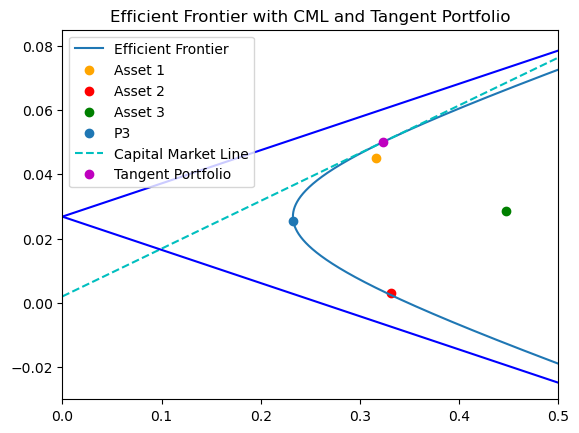

In [448]:
Q = np.matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = np.matrix([[.045,.003,.0285]]).T
e = np.matrix([[1,1,1]]).T
rho_t1 = rho[0]/3
rho_t2 = rho[1]+rho[2]
rho_t3 = (rho[0]+rho[1]+rho[2])/3

alphas = np.arange(-5,5.001,.001)
rhos=[]
sigmas = []
for a in alphas:
    w_vec_a = w_vec_1*a+w_vec_2*(1-a)
    x= w_vec_a.T@rho
    x = np.array(x.T)[0]
    rhos.append(x[0])
    sigma = np.sqrt((w_vec_a.T)*Q*w_vec_a)
    sigma = np.array(sigma.T)[0]
    sigmas.append(sigma[0])
plt.plot(sigmas, rhos,label = 'Efficient Frontier')

Q = ([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho =([[.045,.003,.0285]])
plt.scatter(np.sqrt(Q[0][0]),rho[0][0], color = "orange", label = 'Asset 1')
plt.scatter(np.sqrt(Q[1][1]),rho[0][1], color = "red", label = 'Asset 2')
plt.scatter(np.sqrt(Q[2][2]),rho[0][2], color = "green", label = 'Asset 3')
sigma_1 = np.sqrt(w_vec_3.T*Q*w_vec_3)
sigma_1 = np.array(sigma_1.T)[0]
weight_3
plt.scatter(sigma_1, .0255,label = 'P3')


Q = np.matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = np.matrix([[.045,.003,.0285]]).T
Q_inv = np.linalg.inv((Q))
e = np.matrix([[1,1,1]]).T
C = e.T*Q_inv*e
C = np.array(C)[0][0]
delta = (rho.T@Q_inv@rho)*(C)-(rho.T@Q_inv@e)**2
delta = np.array(delta)[0][0]
A = (rho.T@Q_inv@e)
A = np.array(A)[0][0]
sigs = np.arange(0,.5,.001)
Asym_1s =[]
Asym_2s =[]
for sig in sigs:    
    Asym_1 = np.sqrt(delta/C)*sig+A/C
    Asym_2 = -np.sqrt(delta/C)*sig+A/C
    Asym_1s.append(Asym_1)
    Asym_2s.append(Asym_2)

cml_x = np.arange(0,.501,.001)
plt.plot(cml_x,cml_x*max_sharpe+ rho_f,'c--', label = 'Capital Market Line')
plt.plot(tangent_port_sigma,tangent_port_rho,'mo',label='Tangent Portfolio')
#axline(cml_x,cml_y)
plt.plot(sigs,Asym_1s,color ='blue')
plt.plot(sigs,Asym_2s,color ='blue')
plt.xlim(0,.5)
plt.ylim(-.03,.085)
plt.title('Efficient Frontier with CML and Tangent Portfolio')
plt.legend()
plt.show()

In [449]:
rho_target_1 = .05
sigma_target_2 = .3

In [450]:
alpha_1 = (rho_target_1-rho_f)/(tangent_port_rho-rho_f)
alpha_2 = sigma_target_2/tangent_port_sigma

In [451]:
sigma_target_1 = alpha_1*tangent_port_sigma
rho_target_2 = alpha_2*tangent_port_rho+(1-alpha_2)*rho_f

### Solving for the optimal weights at a target return of .05 and a sigma of .3

In [452]:
w_vec_4 = alpha_1*w_tan_vec 
w_vec_4 = np.array(w_vec_4.T)[0]
print(w_vec_4, "% allocated to the risk free rate: "+ str(1-alpha_1))

[ 0.95241974 -0.22821704  0.27449692] % allocated to the risk free rate: 0.0013003901165918874


In [453]:
w_vec_5 = alpha_2*w_tan_vec 
w_vec_5 = np.array(w_vec_5.T)[0]
print(w_vec_5,"% allocated to the risk free rate: "+ str(1-alpha_2))

[ 0.8847875  -0.21201113  0.25500463] % allocated to the risk free rate: 0.07221900764851208


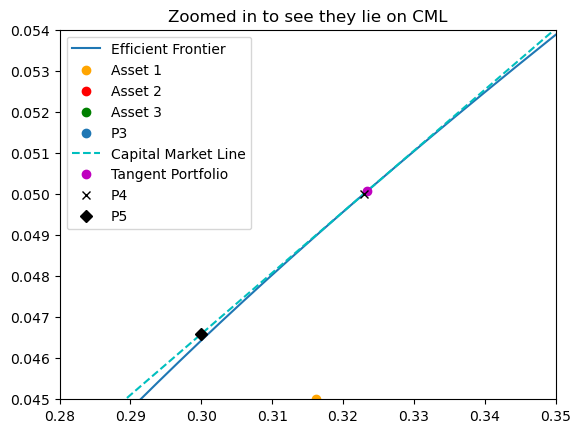

In [454]:
Q = np.matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = np.matrix([[.045,.003,.0285]]).T
e = np.matrix([[1,1,1]]).T
rho_t1 = rho[0]/3
rho_t2 = rho[1]+rho[2]
rho_t3 = (rho[0]+rho[1]+rho[2])/3

alphas = np.arange(-5,5.001,.001)
rhos=[]
sigmas = []
for a in alphas:
    w_vec_a = w_vec_1*a+w_vec_2*(1-a)
    x= w_vec_a.T@rho
    x = np.array(x.T)[0]
    rhos.append(x[0])
    sigma = np.sqrt((w_vec_a.T)*Q*w_vec_a)
    sigma = np.array(sigma.T)[0]
    sigmas.append(sigma[0])
plt.plot(sigmas, rhos,label = 'Efficient Frontier')

Q = ([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho =([[.045,.003,.0285]])
plt.scatter(np.sqrt(Q[0][0]),rho[0][0], color = "orange", label = 'Asset 1')
plt.scatter(np.sqrt(Q[1][1]),rho[0][1], color = "red", label = 'Asset 2')
plt.scatter(np.sqrt(Q[2][2]),rho[0][2], color = "green", label = 'Asset 3')
sigma_1 = np.sqrt(w_vec_3.T*Q*w_vec_3)
sigma_1 = np.array(sigma_1.T)[0]
weight_3
plt.scatter(sigma_1, .0255,label = 'P3')

Q = np.matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = np.matrix([[.045,.003,.0285]]).T
Q_inv = np.linalg.inv((Q))
e = np.matrix([[1,1,1]]).T
C = e.T*Q_inv*e
C = np.array(C)[0][0]
delta = (rho.T@Q_inv@rho)*(C)-(rho.T@Q_inv@e)**2
delta = np.array(delta)[0][0]
A = (rho.T@Q_inv@e)
A = np.array(A)[0][0]
sigs = np.arange(0,.5,.001)
Asym_1s =[]
Asym_2s =[]
for sig in sigs:    
    Asym_1 = np.sqrt(delta/C)*sig+A/C
    Asym_2 = -np.sqrt(delta/C)*sig+A/C
    Asym_1s.append(Asym_1)
    Asym_2s.append(Asym_2)

cml_x = np.arange(0,.501,.001)
plt.plot(cml_x,cml_x*max_sharpe+ rho_f,'c--', label = 'Capital Market Line')
plt.plot(tangent_port_sigma,tangent_port_rho,'mo',label='Tangent Portfolio')
plt.plot(sigma_target_1,rho_target_1, 'kx',label = 'P4')
plt.plot(sigma_target_2,rho_target_2, 'kD',label = 'P5')
#axline(cml_x,cml_y)
plt.plot(sigs,Asym_1s,color ='blue')
plt.plot(sigs,Asym_2s,color ='blue')
plt.xlim(0.28,.35)
plt.ylim(.045,.054)
plt.title('Zoomed in to see they lie on CML')
plt.legend()
plt.show()

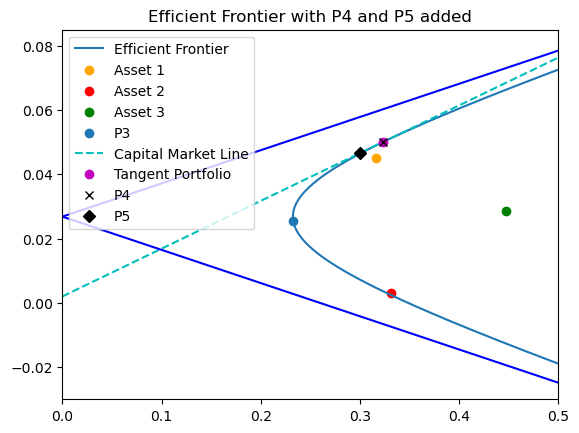

In [455]:
Q = np.matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = np.matrix([[.045,.003,.0285]]).T
e = np.matrix([[1,1,1]]).T
rho_t1 = rho[0]/3
rho_t2 = rho[1]+rho[2]
rho_t3 = (rho[0]+rho[1]+rho[2])/3

alphas = np.arange(-5,5.001,.001)
rhos=[]
sigmas = []
for a in alphas:
    w_vec_a = w_vec_1*a+w_vec_2*(1-a)
    x= w_vec_a.T@rho
    x = np.array(x.T)[0]
    rhos.append(x[0])
    sigma = np.sqrt((w_vec_a.T)*Q*w_vec_a)
    sigma = np.array(sigma.T)[0]
    sigmas.append(sigma[0])
plt.plot(sigmas, rhos,label = 'Efficient Frontier')

Q = ([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho =([[.045,.003,.0285]])
plt.scatter(np.sqrt(Q[0][0]),rho[0][0], color = "orange", label = 'Asset 1')
plt.scatter(np.sqrt(Q[1][1]),rho[0][1], color = "red", label = 'Asset 2')
plt.scatter(np.sqrt(Q[2][2]),rho[0][2], color = "green", label = 'Asset 3')
sigma_1 = np.sqrt(w_vec_3.T*Q*w_vec_3)
sigma_1 = np.array(sigma_1.T)[0]
weight_3
plt.scatter(sigma_1, .0255,label = 'P3')


Q = np.matrix([[.1,.02,.01],[.02,.11,.03],[.01,.03,.2]])
rho = np.matrix([[.045,.003,.0285]]).T
Q_inv = np.linalg.inv((Q))
e = np.matrix([[1,1,1]]).T
C = e.T*Q_inv*e
C = np.array(C)[0][0]
delta = (rho.T@Q_inv@rho)*(C)-(rho.T@Q_inv@e)**2
delta = np.array(delta)[0][0]
A = (rho.T@Q_inv@e)
A = np.array(A)[0][0]
sigs = np.arange(0,.5,.001)
Asym_1s =[]
Asym_2s =[]
for sig in sigs:    
    Asym_1 = np.sqrt(delta/C)*sig+A/C
    Asym_2 = -np.sqrt(delta/C)*sig+A/C
    Asym_1s.append(Asym_1)
    Asym_2s.append(Asym_2)

cml_x = np.arange(0,.501,.001)
plt.plot(cml_x,cml_x*max_sharpe+ rho_f,'c--', label = 'Capital Market Line')
plt.plot(tangent_port_sigma,tangent_port_rho,'mo',label='Tangent Portfolio')
plt.plot(sigma_target_1,rho_target_1, 'kx',label = 'P4')
plt.plot(sigma_target_2,rho_target_2, 'kD',label = 'P5')
#axline(cml_x,cml_y)
plt.plot(sigs,Asym_1s,color ='blue')
plt.plot(sigs,Asym_2s,color ='blue')
plt.xlim(0,.5)
plt.ylim(-.03,.085)
plt.title('Efficient Frontier with P4 and P5 added')
plt.legend()
plt.show()